# Project Ringbauer 2025 onto PCA
Idea: Find Greek samples to extract and test in IBD run

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import socket as socket
import os as os
import sys as sys
import multiprocessing as mp

socket_name = socket.gethostname()
    
if socket_name.startswith("bionc") or socket_name.startswith("hpc"):
    print("Leipzig Cluster detected!")
    path = "/mnt/archgen/users/hringbauer/git/projectPCA/"   
    #path = "/mnt/archgen/users/hringbauer/"
else: 
    raise RuntimeWarning("Not compatible machine. Check!!")
     
os.chdir(path)  # Set the right Path (in line with Atom default)
print(os.getcwd())
print(f"CPU Count: {mp.cpu_count()}")
print(sys.version_info)

#from projectPCA.eigenstrat_funcs import load_genos_autoeager, update_values
from projectPCA.run import project_eigenstrat

%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

Leipzig Cluster detected!
/mnt/archgen/users/hringbauer/git/projectPCA
CPU Count: 128
sys.version_info(major=3, minor=12, micro=3, releaselevel='final', serial=0)


### Test West-Eurasian HO PCA

Eigenstrat packed: False
3 Eigenstrat Files with 1 Individuals and 1233013 SNPs
Filtering 143528 / 531927 SNPs with MAF<0.05.


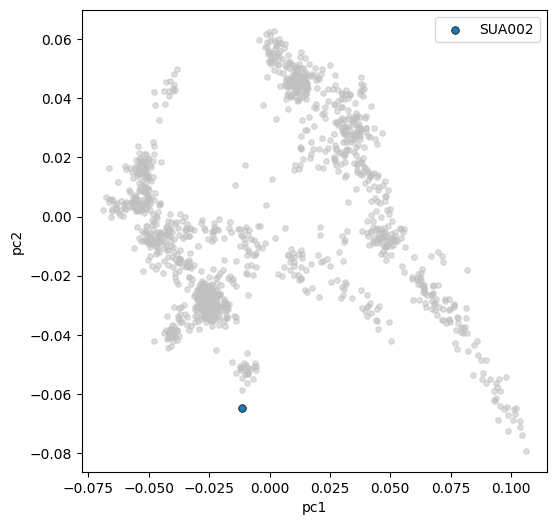

CPU times: user 7.57 s, sys: 655 ms, total: 8.23 s
Wall time: 8.29 s


,pc1,pc2,#SNP,iid
0,-0.011584,-0.06484,334433,SUA002


In [2]:
%%time
project_eigenstrat(es_path="/mnt/archgen/Autorun_eager/eager_outputs/TF/SUA/SUA002/genotyping/pileupcaller.double",
                   pca="HO", es_type="default")

In [4]:
%%time
df_proj = project_eigenstrat(es_path="/mnt/archgen/Autorun_eager/eager_outputs/TF/SUA/SUA002/genotyping/pileupcaller.double",
                   pca="HO", es_type="default", fig_path='./figs/SUA002.html')
df_proj

Eigenstrat packed: False
3 Eigenstrat Files with 1 Individuals and 1233013 SNPs
Filtering 143528 / 531927 SNPs with MAF<0.05.
✅ Saved interactive plot to: ./figs/SUA002.html


CPU times: user 8.11 s, sys: 440 ms, total: 8.55 s
Wall time: 8.56 s


,pc1,pc2,#SNP,iid
0,-0.011584,-0.06484,334433,SUA002


### Pre-Load SNP dataframe + Autoeager

In [3]:
from projectPCA.get_proj_files import get_projection_files

In [4]:
%%time
df_snp = pd.read_csv("/mnt/archgen/Autorun_eager/eager_outputs/TF/SUA/SUA002/genotyping/pileupcaller.double.snp", header=None,
                     sep="\t", engine="python")
df_snp.columns = ["snp", "chr", "map",
                  "pos", "ref", "alt"]  # Set the Columns

CPU times: user 3.92 s, sys: 295 ms, total: 4.21 s
Wall time: 4.2 s


In [5]:
%%time
pf = get_projection_files("HO") # Load the pre-computed PC Object
dfw = pf.get_snp_weights()
df_bgrd_pcs = pf.get_projections_ref()

CPU times: user 308 ms, sys: 8.09 ms, total: 317 ms
Wall time: 339 ms


3 Eigenstrat Files with 1 Individuals and 1233013 SNPs
Filtering 143528/531927 fixed SNPs.


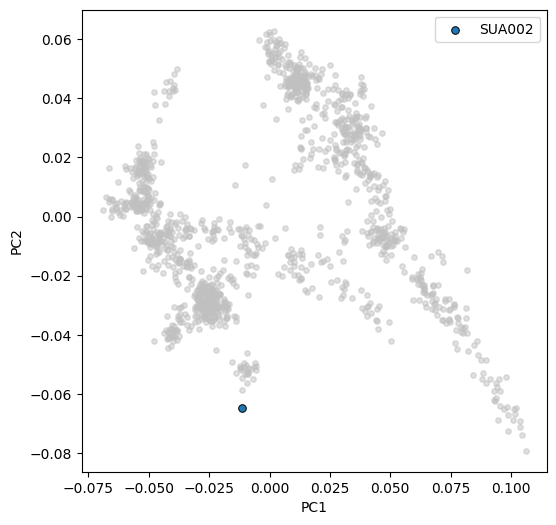

CPU times: user 1.01 s, sys: 76.4 ms, total: 1.09 s
Wall time: 1.1 s


,pc1,pc2,#SNP,iid
0,-0.011584,-0.06484,334433,SUA002


In [7]:
%%time
project_eigenstrat(es_path="/mnt/archgen/Autorun_eager/eager_outputs/TF/SUA/SUA002/genotyping/pileupcaller.double",
                   df_snp=df_snp, dfw=dfw, df_bgrd_pcs=df_bgrd_pcs,
                   es_type="autoeager")

# Test Ringbauer 2025 Punic eigenstrat PCA

In [ ]:
%%time
df_out = project_eigenstrat(es_path="/mnt/archgen/users/hringbauer/data/ringbauer2025_es/punic208.v54.3_1240k",
                   plot=False, 
                   es_type="default")

Eigenstrat packed: True
3 Eigenstrat Files with 208 Individuals and 1207104 SNPs


Eigenstrat packed: True
3 Eigenstrat Files with 208 Individuals and 1207104 SNPs
Filtering 130447/518388 fixed SNPs.


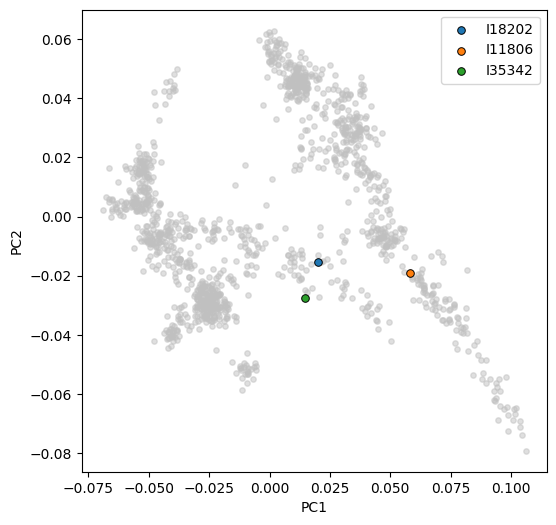

In [5]:
df_out = project_eigenstrat(es_path="/mnt/archgen/users/hringbauer/data/ringbauer2025_es/punic208.v54.3_1240k",
                            iids = ["I18202", "I11806","I35342"],
                            es_type="default")

# 2) Joscha's Finescale EU PCA

Eigenstrat packed: False
3 Eigenstrat Files with 1 Individuals and 1233013 SNPs
Filtering 30518/409586 fixed SNPs.


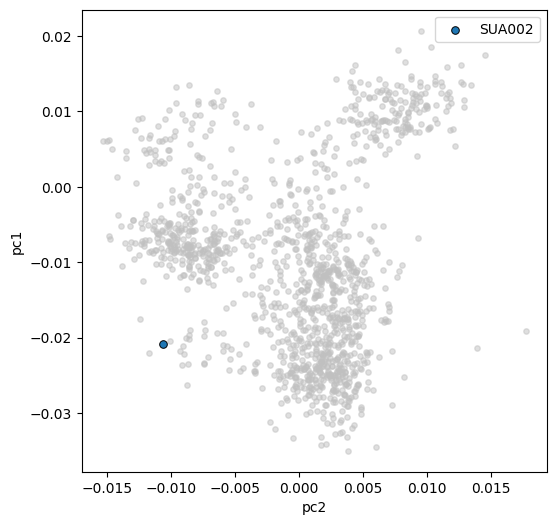

CPU times: user 7.4 s, sys: 575 ms, total: 7.97 s
Wall time: 7.97 s


,pc1,pc2,#SNP,iid
0,-0.020822,-0.010639,242672,SUA002


In [3]:
%%time
project_eigenstrat(es_path="/mnt/archgen/Autorun_eager/eager_outputs/TF/SUA/SUA002/genotyping/pileupcaller.double",
                   pca="EU", es_type="default",  plot=['pc2', 'pc1'])

3 Eigenstrat Files with 1 Individuals and 1233013 SNPs
Filtering 30518/409586 fixed SNPs.


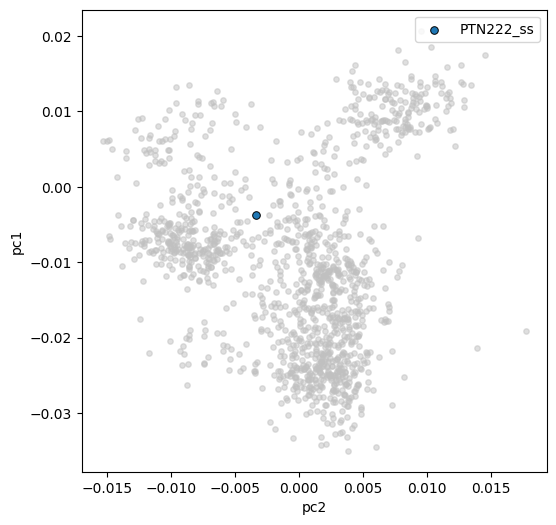

CPU times: user 5.92 s, sys: 440 ms, total: 6.36 s
Wall time: 6.36 s


,pc1,pc2,#SNP,iid
0,-0.003712,-0.00333,255193,PTN222_ss


In [5]:
%%time
project_eigenstrat(es_path="/mnt/archgen/Autorun_eager/eager_outputs/SG/PTN/PTN222/genotyping/pileupcaller.single",
                   pca="EU", es_type="autoeager",  plot=['pc2', 'pc1'])

In [5]:
df_out = project_eigenstrat(es_path="/mnt/archgen/users/hringbauer/data/ringbauer2025_es/punic208.v54.3_1240k",
                            iids = ["I18202", "I11806","I35342"], fig_path='./figs/punic3.html',
                            es_type="default")

Eigenstrat packed: True
3 Eigenstrat Files with 208 Individuals and 1207104 SNPs
Filtering 130447 / 518388 SNPs with MAF<0.05.
✅ Saved interactive plot to: ./figs/punic3.html


# Area 51

### Test Speed of Loading

In [ ]:
from projectPCA.loadEigenstrat import get_eigenstrat_object # Load eigenstrat

In [10]:
%%time

es = get_eigenstrat_object("/mnt/archgen/users/hringbauer/data/ringbauer2025_es/punic208.v54.3_1240k", mode="default")

Eigenstrat packed: True
3 Eigenstrat Files with 208 Individuals and 1207104 SNPs
CPU times: user 6.44 s, sys: 127 ms, total: 6.57 s
Wall time: 6.54 s


In [11]:
%%time
g = es.get_geno_iid(iid="I12433")
g

CPU times: user 39.2 ms, sys: 18.1 ms, total: 57.3 ms
Wall time: 56.5 ms


array([nan,  0., nan, ..., nan, nan,  0.], shape=(1207104,), dtype=float16)

In [12]:
pd.value_counts(g)

/tmp/ipykernel_2889876/4028245601.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(g)


2.0    533682
0.0    230299
Name: count, dtype: int64

In [3]:
%%time
from projectPCA.get_proj_files import get_projection_files

pf = get_projection_files("HO") # Load the pre-computed PC Object
df_bgrd_pcs = pf.get_projections_ref()
df_bgrd_pcs.head()

CPU times: user 328 ms, sys: 4.1 ms, total: 332 ms
Wall time: 339 ms


,iid,sex,pop,pc1e,pc2e,pc1,pc2
0,ABA-035.HO,M,Karachai.HO,0.014853,0.053640,0.014853,0.053640
1,ABA-048.HO,M,Karachai.HO,0.010207,0.045873,0.010207,0.045873
2,ABA-052.HO,M,Karachai.HO,0.012713,0.047646,0.012713,0.047646
3,ABA-056.HO,M,Karachai.HO,0.011672,0.049979,0.011672,0.049979
4,ABA-065.HO,M,Karachai.HO,0.011175,0.050255,0.011175,0.050255


In [8]:
df_bgrd_pcs["pop"].value_counts()

pop
Spanish.HO              172
Russian.HO               71
French.HO                61
Turkish.HO               50
Druze.HO                 39
                       ... 
Albanian.HO               6
Turkish_Balikesir.HO      5
Spanish_North.HO          5
Scottish.HO               4
Italian_South.HO          4
Name: count, Length: 77, dtype: int64

In [9]:
len(df_bgrd_pcs)

1250